In [3]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os

In [7]:
#Desactivando alertas y preparando data set
warnings.simplefilter("ignore")
os.chdir('C:\\Users\\wichi\\OneDrive\\Documentos\\EBAC\\Data Science\\Actividades\\El algoritmo KNN y métricas de clasificación\\activity')
df_preprocess = pd.read_csv('recursos_humanos.csv')

In [8]:
df_preprocess.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
#Contando nulos
df_preprocess.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [13]:
df_preprocess.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [14]:
#Cambiando Variables Categoricas en numericas
from sklearn.preprocessing import LabelEncoder
categorical_columns  = ['sales','salary']
for column in categorical_columns:
    le =LabelEncoder()
    df_preprocess[column] = le.fit_transform(df_preprocess[column])

In [15]:
df_preprocess

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [23]:
#Ver si los datos estan equilibrados
var_objetivo = df_preprocess['left']
counts_var_objetivo = var_objetivo.value_counts()

0    11428
1     3571
Name: left, dtype: int64

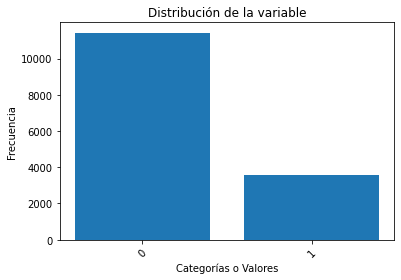

In [25]:
plt.bar(counts_var_objetivo.index, counts_var_objetivo.values)
plt.xlabel('Categorías o Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable')
plt.xticks(range(len(counts_var_objetivo)), counts_var_objetivo.index, rotation=45)
plt.show()

Como podemos observar nuestros datos objetivo no se encuentran balanceados por lo quedebemos de tomar en cuenta esto cuando vayamos a utilizar las metricas de evaluación.

In [56]:
#Separando el data frame
x = df_preprocess.drop('left', axis = 1)
y = df_preprocess['left']

Text(0.5, 1.0, 'Método del codo')

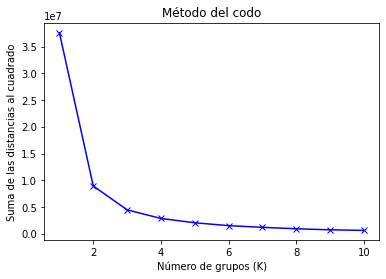

In [52]:
#Encontrando el valor optimo de K
from sklearn.cluster import KMeans
k_values = range(1,11)
distortions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_preprocess)
    distortions.append(kmeans.inertia_)
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Número de grupos (K)')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del codo')

Al realizar el metodo del codo, encontramos que el valor optimo para K es 3, que serian los K vecinos a colocar en el modelo

In [57]:
#Si hacemos lo mismo pero ahora con una validacion cruzada
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_values = [3, 5, 7, 9, 11]

# Realiza la validación cruzada para cada valor de K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    print(f"K={k}, Accuracy: {mean_score}")

K=3, Accuracy: 0.932461576080916
K=5, Accuracy: 0.926927887073469
K=7, Accuracy: 0.9278608425030566
K=9, Accuracy: 0.9251273091030343
K=11, Accuracy: 0.9200600866955652


Ahora tenemos comprobado por dos metodos cual es valor optimo para K

In [58]:
#Normalizando los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalizado = scaler.fit_transform(df_preprocess)
df_normalizado = pd.DataFrame(df_normalizado, columns = df_preprocess.columns)
x_n = df_normalizado.drop('left', axis = 1)
y_n = df_normalizado['left']


In [59]:
# Separando Bases de Entrenamiento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_n,y_n, test_size=0.30, random_state=1)

In [60]:
#Modelo KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('Score: ', knn.score(x_test, y_test))

Score:  0.9571111111111111


In [63]:
#Matriz de confusión
y_predictions = prediction
y_true = y_test
#Creacion de la matriz
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_predictions)
cm

array([[3297,  119],
       [  74, 1010]], dtype=int64)

In [68]:
pd.DataFrame(cm, columns = ['No Abandono', 'Abadonado'], index = ['No Abadonado', 'Abandonado'])

,No Abandono,Abadonado
No Abadonado,3297,119
Abandonado,74,1010


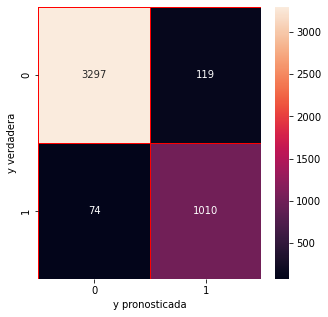

In [71]:
#Visualizacion de la matriz
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor='red', fmt = '.0f', ax =ax )
plt.xlabel('y pronosticada')
plt.ylabel('y verdadera')
plt.show()


In [72]:
#Calculo de precision global
correcto = cm[0,0] + cm[1,1]
incorrecto = cm[0,1] + cm[1,0]
precision_global = correcto / (correcto+ incorrecto)
precision_global

0.9571111111111111

In [73]:
PrecisionNoAbandono = cm[0,0]/(cm[0,0]+cm[1,0])
PrecisionNoAbandono

0.9780480569563927

In [74]:
PrecisionAbandono = cm[1,1]/(cm[1,1]+cm[0,1])
PrecisionAbandono

0.8945969884853853

## Curva ROC de KNN


In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [78]:
y_scores = knn.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test, y_scores[:,1])
roc_auc = auc(fpr,tpr)


plt.title('Curva ROC de KNN')
plt.plot(fpr, tpr, 'b', label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('False positive rate')
plt.xlabel('True positive rate')
plt.show()

## Conclusión

Mediante la implementación de técnicas como el método del codo y la validación cruzada, hemos determinado que el número óptimo de grupos (K) es igual a 3.

Al evaluar el modelo con este valor de K, hemos logrado obtener un score global de efectividad del 95.711%. Esto indica que nuestro modelo es capaz de clasificar correctamente el 95.711% de los casos en relación a la permanencia o salida de los empleados.

Además, al analizar la matriz de confusión, hemos observado que nuestro modelo tiene una alta efectividad del 97.8% para predecir cuando los empleados no abandonarán la empresa. Esta métrica es especialmente importante, ya que nos permite identificar aquellos empleados que son más propensos a permanecer con nosotros, lo que nos brinda la oportunidad de implementar estrategias de retención más efectivas.